# Анализ данных Яндекс.Афиши

## Введение

### Содержание:
* [1.2  Имеющиеся у нас данные:](#1.1)
* [1.3  Что нам предстоит изучить:](#1.2)
* [2  Шаг 1. Загружаем данные и готовим их к анализу](#2)
* [2.1  Кладем данные в переменные](#2.1)
* [2.2  Готовим данные](#2.2)
* [2.3  Вывод](#2.3)
* [3.1  Продуктовые метрики](#3.1)
* [3.1.1  Рассчитываем DAU, WAU и MAU](#3.1.1)
* [3.1.2  Рассчитываем среднее количество заходов на сайт в день для каждого пользователя](#3.1.2)
* [3.1.3  Исследуем, сколько времени в среднем пользователи проводят на сайте](#3.1.3)
* [3.1.4  Рассчитываем retention rate с применением когортного анализа](#3.1.4)
* [3.1.5  Вывод](#3.1.5)
* [3.2  Метрики электронной коммерции](#3.2)
* [3.2.1  Время от первого посещения сайта до первой покупки](#3.2.1)
* [3.2.2  Среднее количество покупок на одного покупателя за 6 месяцев](#3.2.2)
* [3.2.3  Средний чек](#3.2.3)
* [3.2.4  Изменение LTV покупателя по когортам](#3.2.4)
* [3.2.5  Вывод](#3.2.5)
* [3.3  Маркетинговые метрики](#3.3)
* [3.3.1  Общая сумма расходов на маркетинг и распределение по источникам](#3.3.1)
* [3.3.2  Средний CAC на одного покупателя](#3.3.2)
* [3.3.3  Рассчитываем ROMI по когортам в разрезе источников](#3.3.3)
* [3.3.4  Вывод](#3.3.4)
* [4  Выводы и рекомендации](#4)
* [4.1  Источники трафика](#4.1)
* [4.2  Выводы после подсчета всех видов метри](#4.2)
* [4.3  Самые перспективные для компании когорты клиентов](#4.3)

### Имеющиеся у нас данные:

Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

### Что нам предстоит изучить:

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

## Шаг 1. Загружаем данные и готовим их к анализу <a class="anchor" id="2">

### Кладем данные в переменные <a class="anchor" id="2.1">

Для начала импортируем нужные библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Теперь положим данные в переменные.

In [2]:
visits_df=pd.read_csv('/datasets/visits_log.csv')
orders_df=pd.read_csv('/datasets/orders_log.csv')
costs_df=pd.read_csv('/datasets/costs.csv')

### Готовим данные <a class="anchor" id="2.2">

Посмотрим на каждый из наборов данных и убедимся в том, что типы данных во всех колонках соответствуют сохраненным в них значениям. Начнем с данных по визитам.

In [3]:
print(visits_df.info())
display(visits_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Как видим, записи в колонках начала и конца сессии имеют строковый тип. Преобразуем их к типу даты.

In [4]:
visits_df['End Ts']=pd.to_datetime(visits_df['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits_df['Start Ts']=pd.to_datetime(visits_df['Start Ts'], format='%Y-%m-%d %H:%M:%S')

Посмотрим на результат.

In [5]:
print(visits_df.info())
display(visits_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Как видим, теперь все нормально. Переходим к набору данных по заказам.

In [6]:
print(orders_df.info())
display(orders_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Здесь дата заказа также имеет строковый тип. Приведем ее к формату даты.

In [7]:
orders_df['Buy Ts']=pd.to_datetime(orders_df['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

Посмотрим, что получилось.

In [8]:
print(orders_df.info())
display(orders_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Здесь тоже все нормально. Переходим к набору данных по расходам.

In [9]:
print(costs_df.info())
display(costs_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Здесь дата совершения расхода также имеет строковый тип. Приведем ее к формату даты.

In [10]:
costs_df['dt']=pd.to_datetime(costs_df['dt'], format='%Y-%m-%d')

Посмотрим, что получилось.

In [11]:
print(costs_df.info())
display(costs_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Здесь тоже все нормально. На этом необходимые действия на этом шаге завершены.

### Вывод <a class="anchor" id="2.3">

На данном шаге мы загрузили имеющиеся у нас данные в переменные и изучили их. Было выявлено, что все колонки с датами имеют строковый тип данных, мы привели их к формату даты. Других проблем или пропусков данных выявлено не было.

## Шаг 2. Рассчитываем метрики и строим графики <a class="anchor" id="3">

### Продуктовые метрики <a class="anchor" id="3.1">

#### Рассчитываем DAU, WAU и MAU <a id='3.1.1'></a>

На данном этапе мы будем работать с набором данных о визитах. Для начала выделим из даты начала визита отдельно колонки с днем, неделей, месяцем и полной датой визита.

In [12]:
visits_df['session_year']  = visits_df['Start Ts'].astype('datetime64[Y]')
visits_df['session_month'] = visits_df['Start Ts'].astype('datetime64[M]')
visits_df['session_week']  = visits_df['Start Ts'].astype('datetime64[W]')
visits_df['session_date'] = visits_df['Start Ts'].dt.date
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08


Начнем с DAU. Вычислим DAU на каждую дату.

In [13]:
dau=visits_df.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()
#Посмотрим, что получилось
display(dau.head(10))

,session_date,Uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
5,2017-06-06,797
6,2017-06-07,699
7,2017-06-08,868
8,2017-06-09,695
9,2017-06-10,350


Вычислим средний DAU за период.

In [14]:
print('Средний DAU за исследуемый период:',dau['Uid'].mean().astype('int'))

Средний DAU за исследуемый период: 907


Как видим, средний DAU за период равен 907. Теперь на основании имеющихся данных построим график изменения DAU во времени.

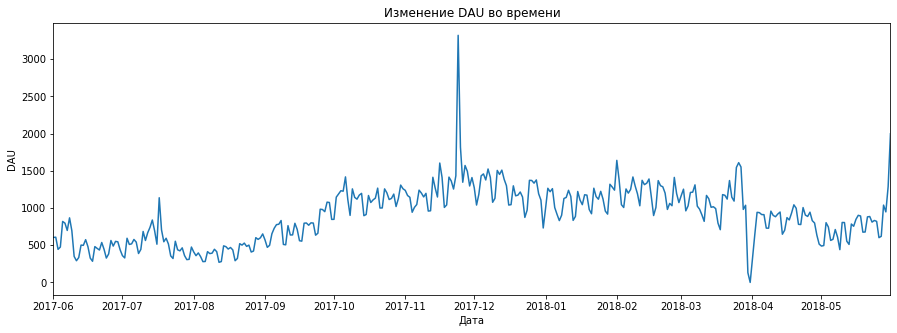

In [15]:
dau.plot(figsize=(15,5), x='session_date', y='Uid', title='Изменение DAU во времени', legend=False)
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.show()

Как видим, помимо одного большого пика в районе конца ноября 2017 года и одного провала в районе начала апреля 2018 года, график DAU имеет волновую форму - периоды роста чередуются с периодами падения. Поскольку данные не охватывают целиком даже один год, сделать выводы довольно сложно, хотя имеется слабая тенденция к росту DAU, но насколько устойчивой она является, неясно.

Перейдем к рассмотрению WAU. Начнем с вычисления WAU за каждую неделю.

In [16]:
wau=visits_df.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).reset_index()
#Посмотрим, что получилось
display(wau.head(10))

,session_year,session_week,Uid
0,2017-01-01,2017-06-01,4082
1,2017-01-01,2017-06-08,3311
2,2017-01-01,2017-06-15,2844
3,2017-01-01,2017-06-22,3079
4,2017-01-01,2017-06-29,3055
5,2017-01-01,2017-07-06,3563
6,2017-01-01,2017-07-13,4790
7,2017-01-01,2017-07-20,2978
8,2017-01-01,2017-07-27,2505
9,2017-01-01,2017-08-03,2343


Теперь вычислим средний WAU за период.

In [17]:
print('Средний WAU за исследуемый период:',wau['Uid'].mean().astype('int'))

Средний WAU за исследуемый период: 5621


Как видим, средний WAU равен 5621. Теперь построим график, чтобы отобразить изменение WAU во времени.

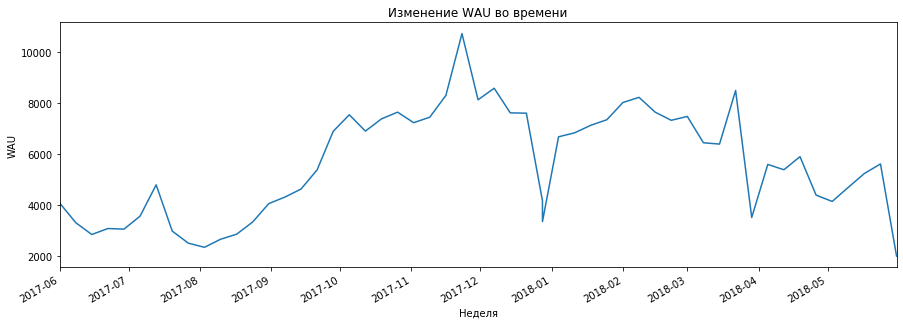

In [18]:
wau.plot(figsize=(15,5), y='Uid', x='session_week', title='Изменение WAU во времени', legend=False)
plt.xlabel('Неделя')
plt.ylabel('WAU')
plt.show()

Как видим, изменение WAU также имеет циклический характер: периоды роста чередуются с периодами падения. Из имеющегося графика сложно сделать вывод о дальнейшем направлении движения WAU, но похоже, что сейчас этот показатель находится в фазе падения.

Перейдем к рассмотрению MAU. Начнем с вычисления MAU за каждый месяц.

In [19]:
mau=visits_df.groupby(['session_year','session_month']).agg({'Uid': 'nunique'}).reset_index()
#Посмотрим, что получилось
display(mau.head(10))

,session_year,session_month,Uid
0,2017-01-01,2017-06-01,13259
1,2017-01-01,2017-07-01,14183
2,2017-01-01,2017-08-01,11631
3,2017-01-01,2017-09-01,18975
4,2017-01-01,2017-10-01,29692
5,2017-01-01,2017-11-01,32797
6,2017-01-01,2017-12-01,31557
7,2018-01-01,2018-01-01,28716
8,2018-01-01,2018-02-01,28749
9,2018-01-01,2018-03-01,27473


Теперь вычислим средний MAU за период.

In [20]:
print('Средний MAU за исследуемый период:',mau['Uid'].mean().astype('int'))

Средний MAU за исследуемый период: 23228


Как видим, средний MAU за исследуемый период равен 23228. Теперь построим график, чтобы изучить изменение MAU во времени.

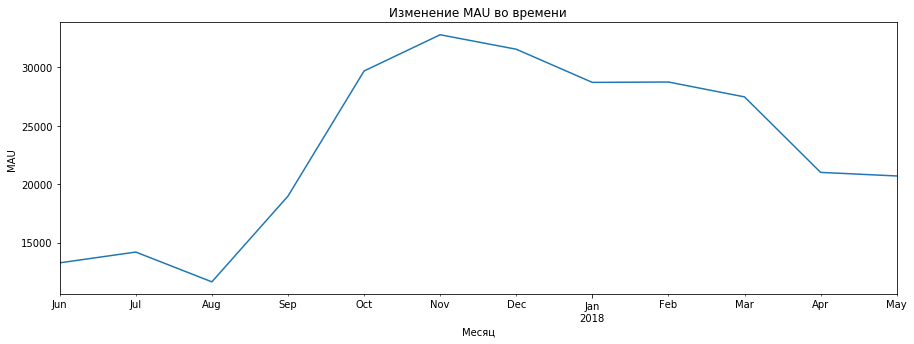

In [21]:
mau.plot(figsize=(15,5), y='Uid', x='session_month', title='Изменение MAU во времени', legend=False)
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.show()

Как видим, после периода роста MAU последовал период падения, который продолжается и сейчас. Впрочем, это может объясняться сезонными факторами, в данном случае необходим более продолжительный период времени для исследования.

#### Рассчитываем среднее количество заходов на сайт  в день для каждого пользователя <a class="anchor" id="3.1.2">

Рассчитаем, сколько раз в день средний пользователь заходит на сайт. Для этого для каждой даты разделим общее количество визитов на количество уникальных пользователей.

In [22]:
#Сгруппируем общее количество визитов и количество уникальных пользователей по датам
average_visits=visits_df.groupby('session_date').agg({'Uid': ['count','nunique']}).reset_index()
#Приведем в порядок названия столбцов
average_visits.columns=average_visits.columns.droplevel(0)
average_visits.columns=['date','visits','users']
#Разделим количество посещений на количество посетителей
average_visits['average']=average_visits['visits']/average_visits['users']
#Посмотрим, что получилось
display(average_visits.head(10))

,date,visits,users,average
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
5,2017-06-06,875,797,1.097867
6,2017-06-07,788,699,1.127325
7,2017-06-08,939,868,1.081797
8,2017-06-09,755,695,1.086331
9,2017-06-10,375,350,1.071429


Теперь вычислим среднее значение этого показателя за все время.

In [23]:
print('Среднее количество посещений на одного пользователя в день:',average_visits['average'].mean())

Среднее количество посещений на одного пользователя в день: 1.082169644003972


Как видим, в среднем пользователи заходят на сайт чуть больше одного раза в день. Построим график, отражающий изменение этого показателя во времени.

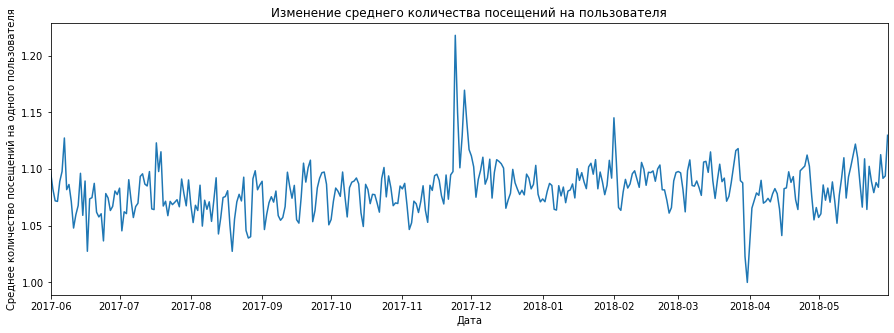

In [24]:
average_visits.plot(figsize=(15,5), x='date', y='average', legend=False, title='Изменение среднего количества посещений на пользователя')
plt.xlabel('Дата')
plt.ylabel('Среднее количество посещений на одного пользователя')
plt.show()

На графике видим два выделяющихся значения на уже знакомых нам по графику DAU датах: большой пик в районе конца ноября 2017 года и большой провал в районе начала апреля 2018 года. В остальном показатель колеблется вокруг среднего без каких бы то ни было ярко выраженных тенденций к долговременному увеличению или уменьшению.

#### Исследуем, сколько времени в среднем пользователи проводят на сайте <a class="anchor" id="3.1.3">

Вычислим продолжительность каждой пользовательской сессии, вычтя из времени ее окончания время ее начала.

In [25]:
visits_df['session_length']=(visits_df['End Ts']-visits_df['Start Ts']).dt.seconds
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60


Построим гистограмму распределения длин пользовательских сессий.

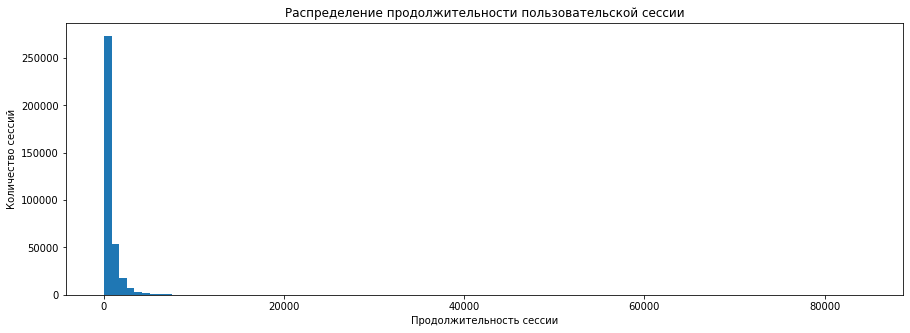

In [26]:
visits_df['session_length'].plot(kind='hist', figsize=(15,5), bins=100, title='Распределение продолжительности пользовательской сессии')
plt.xlabel('Продолжительность сессии')
plt.ylabel('Количество сессий')
plt.show()

Как видим, разброс весьма широк, но абсолютное большинство значений находятся в районе нуля. Возможно, это связано с тем, что, как мы видели в предыдущем пункте, время начала и окончания сессии всегда округлено до минуты, а следовательно, все сессии продолжительностью меньше минуты будут иметь длительность 0. Рассчитаем моду, чтобы увидеть, какое значение встречается чаще всего. 

In [27]:
print('Модальная продолжительность пользовательской сессии:',visits_df['session_length'].mode())

Модальная продолжительность пользовательской сессии: 0    60
dtype: int64


Итак, наиболее часто встречающиеся сессии имеют продолжительность до одной минуты.

#### Рассчитываем retention rate с применением когортного анализа <a class="anchor" id="3.1.4">

Для начала разобьем пользователей на когорты на основании того, в каком месяце они впервые зашли на сайт. 

In [28]:
#Выделяем Series, в который записываем дату первого посещения сайта
first_visit_date = visits_df.groupby(['Uid'])['session_date'].min()
first_visit_date.name = 'first_visit_date'
#Объединяем Series с исходным датафреймом
visits_df = visits_df.join(first_visit_date,on='Uid')
#Посмотрим, что получилось
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60,2017-11-08


Теперь выделим месяцы из столбцов с датой сессии и с датой первой сессии.

In [29]:
visits_df['first_visit_month']=visits_df['first_visit_date'].astype('datetime64[M]')
visits_df['visit_month']=visits_df['session_date'].astype('datetime64[M]')
#Посмотрим, что получилось
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length,first_visit_date,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-01,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29,2017-06-01,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05,2017-11-01,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180,2017-07-19,2017-07-01,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60,2017-11-08,2017-11-01,2017-11-01


Далее для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты.

In [30]:
visits_df['cohort_lifetime'] = (visits_df['visit_month'] - visits_df['first_visit_month'])
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'].round()
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'].astype('int')
#Посмотрим, что получилось
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-01,2017-12-01,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29,2017-06-01,2018-01-01,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05,2017-11-01,2017-11-01,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180,2017-07-19,2017-07-01,2017-07-01,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60,2017-11-08,2017-11-01,2017-11-01,0


Теперь сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей для каждого месяца ее жизни.

In [31]:
cohorts = visits_df.groupby(['first_visit_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
display(cohorts.head(10))

,first_visit_month,cohort_lifetime,Uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


Теперь для каждой когорты найдем количество пользователей, бывших в ней на нулевой месяц ее жизни, и объединим эти данные с данными по когортам.

In [32]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
display(cohorts.head(10))

,first_visit_month,cohort_lifetime,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259
6,2017-06-01,6,809,13259
7,2017-06-01,7,766,13259
8,2017-06-01,8,694,13259
9,2017-06-01,9,674,13259


Теперь разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте, чтобы получить retention rate.

In [33]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
display(cohorts.head(10))

,first_visit_month,cohort_lifetime,Uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
5,2017-06-01,5,947,13259,0.071423
6,2017-06-01,6,809,13259,0.061015
7,2017-06-01,7,766,13259,0.057772
8,2017-06-01,8,694,13259,0.052342
9,2017-06-01,9,674,13259,0.050833


Наконец, построим сводную таблицу и создадим тепловую карту для визуализации.

In [34]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

Text(93.5, 0.5, 'Когорта')

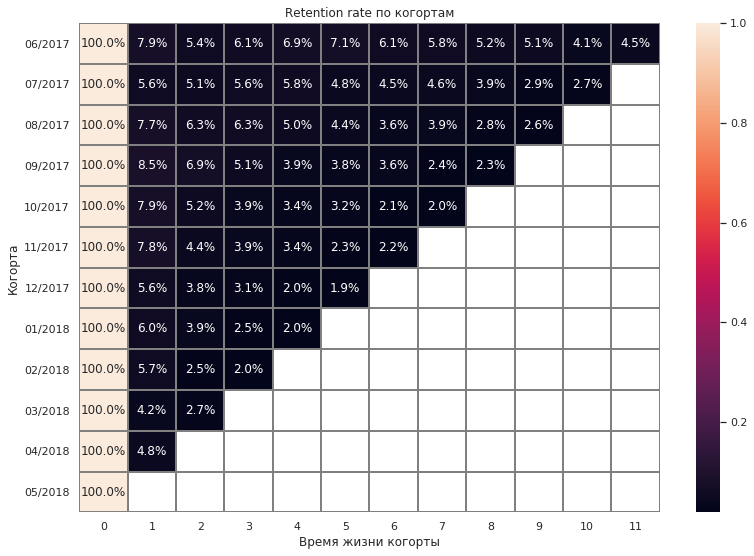

In [35]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention rate по когортам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
plt.xlabel('Время жизни когорты')
plt.ylabel('Когорта')

Наконец, найдем средний Retention Rate на второй месяц «жизни» когорт.

In [36]:
print('Средний Retention Rate на второй месяц «жизни» когорт: {:.2%}'.format(cohorts.query('cohort_lifetime==1')['retention'].mean()))

Средний Retention Rate на второй месяц «жизни» когорт: 6.52%


Как видим, средний retention rate на второй месяц жизни когорт составляет немногим более 6,5%.

#### Вывод <a class="anchor" id="3.1.5">

Мы вычислили основные продуктовые метрики сервиса за исследуемый период. Средний DAU оказался равен 907, изменения носят циклический характер со слабой тенденцией к повышению. Средний WAU - 5716, также имеет циклический характер и находится в фазе спада на конец периода. Средний MAU - 23228, к концу периода также находится в фазе падения. Все три показателя очевидно имеют сезонный характер.

Среднее количество заходов на сайт в день для каждого активного пользователя - чуть больше одного, график изменения не показывает устойчивых тенденций к росту или падению или цикличности.

Типичная пользовательская сессия на сайте длится до одной минуты.

Retention rate сервиса не очень высокий. Средний retention rate на второй месяц жизни когорты - чуть больше 6,5%.

### Метрики электронной коммерции <a class="anchor" id="3.2">

#### Время от первого посещения сайта до первой покупки <a class="anchor" id="3.2.1">

Информация о покупках содержится в датафрейме orders_df. Сгруппируем данные в нем так, чтобы получить дату совершения каждым пользователем первой покупки.

In [37]:
first_order_date = orders_df.groupby(['Uid'])['Buy Ts'].min()
#Меняем имя, чтобы избежать дублирования названий
first_order_date.name = 'first_order_date'

Теперь объединим эти данные с данными по первым визитам, оставим из даты и времени первого заказа только дату и посмотрим на результат.

In [38]:
first_dates=pd.concat([first_visit_date,first_order_date], axis=1).reset_index()
first_dates['first_order_date']=first_dates['first_order_date'].dt.date
display(first_dates.head(10))

,Uid,first_visit_date,first_order_date
0,11863502262781,2018-03-01,NaT
1,49537067089222,2018-02-06,NaT
2,297729379853735,2017-06-07,NaT
3,313578113262317,2017-09-18,2018-01-03
4,325320750514679,2017-09-30,NaT
5,397399764396656,2018-01-18,NaT
6,407573351275847,2017-06-17,NaT
7,498809019029702,2018-02-21,NaT
8,526778907996220,2017-10-21,NaT
9,577434573913691,2018-01-28,NaT


Как видим, далеко не все пользователи вообще сделали хотя бы один заказ за период. Посмотрим, много ли таких.

In [39]:
first_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 3 columns):
Uid                 228169 non-null uint64
first_visit_date    228169 non-null object
first_order_date    36523 non-null object
dtypes: object(2), uint64(1)
memory usage: 5.2+ MB


Получается, что из 228169 уникальных посетителей сервиса за исследуемый период только 36523 вообще сделали хотя бы один заказ.

Теперь выделим в отдельную колонку разницу между датой первого заказа и первого посещения.

In [40]:
first_dates['date_difference']=first_dates['first_order_date']-first_dates['first_visit_date']
first_dates['date_difference']=first_dates['date_difference'] / np.timedelta64(1, 'D')
first_dates['date_difference']=first_dates['date_difference'].astype('int', errors='ignore')
display(first_dates.head(10))

,Uid,first_visit_date,first_order_date,date_difference
0,11863502262781,2018-03-01,NaT,NaN
1,49537067089222,2018-02-06,NaT,NaN
2,297729379853735,2017-06-07,NaT,NaN
3,313578113262317,2017-09-18,2018-01-03,107.0
4,325320750514679,2017-09-30,NaT,NaN
5,397399764396656,2018-01-18,NaT,NaN
6,407573351275847,2017-06-17,NaT,NaN
7,498809019029702,2018-02-21,NaT,NaN
8,526778907996220,2017-10-21,NaT,NaN
9,577434573913691,2018-01-28,NaT,NaN


Посмотрим на характеристики столбца с разницей во времени между первым посещением и первой покупкой.

In [41]:
first_dates['date_difference'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: date_difference, dtype: float64

Итак, как мы видим, более половины пользователей из всех, которые совершили заказ, сделали это сразу же в день первого посещения сервиса, а 75% сделали это в течение двух дней с момента первого посещения. Построим гистограмму, чтобы лучше понять распределение.

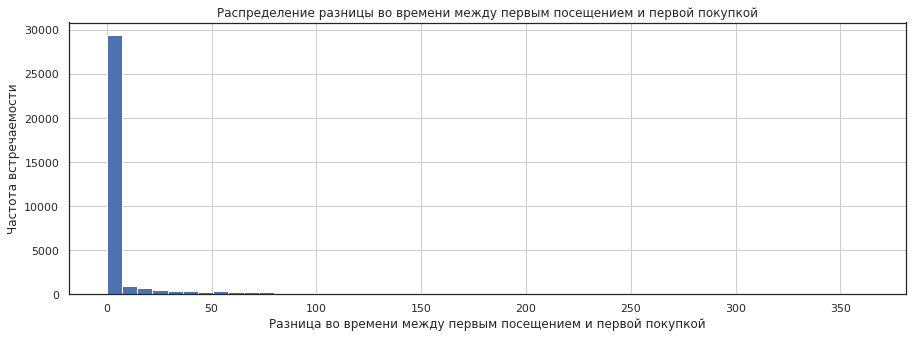

In [42]:
first_dates.hist(column='date_difference', figsize=(15,5), bins=50)
plt.title('Распределение разницы во времени между первым посещением и первой покупкой')
plt.xlabel('Разница во времени между первым посещением и первой покупкой')
plt.ylabel('Частота встречаемости')
plt.show()

Итак, мы видим, что за пределами нулевого дня покупки, на который приходится большинство приобретений, частота покупок резко падает почти до нуля. Если вспомнить, что большинство пользователей за отчетный период не совершили ни одной покупки, получается, что если пользователь зарегистрировался и не совершил покупку сразу, он с высокой вероятностью не совершит ее в течение нескольких следующих месяцев. Впрочем, для более объективного анализа, учитывая характер сервиса и сезонность, лучше иметь данные за несколько лет. 

#### Среднее количество покупок на одного покупателя за 6 месяцев <a class="anchor" id="3.2.2">

Частично необходимую для ответа на этот вопрос работу мы уже проделали в предыдущих пунктах. Поскольку нас интересуют только покупатели, обратимся к датафрейму orders_df - это позволит нам отсеять посетителей, которые не совершили ни одной покупки, а таких, как мы уже выяснили на предыдущем шаге, большинство.

Объединим данные о дате первой покупки с общими данными о покупках.

In [43]:
orders_df = orders_df.join(first_order_date,on='Uid')
#Посмотрим, что получилось
display(orders_df.head(10))

,Buy Ts,Revenue,Uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00


Выделим месяц покупки из столбцов даты покупки и даты первой покупки.

In [44]:
orders_df['first_order_month']=orders_df['first_order_date'].astype('datetime64[M]')
orders_df['order_month']=orders_df['Buy Ts'].astype('datetime64[M]')
#Посмотрим, что получилось
display(orders_df.head(10))

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01


Теперь для каждой строки рассчитаем lifetime пользователя в рамках когорты.

In [45]:
orders_df['cohort_lifetime'] = (orders_df['order_month'] - orders_df['first_order_month'])
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'].round()
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'].astype('int') 
#Посмотрим, что получилось
display(orders_df.head(10))

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01,0
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01,0
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01,0
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01,0


Теперь сгруппируем данные по когортам и lifetime, чтобы найти количество пользователей и покупок по каждой когорте за каждый период.

In [46]:
order_cohorts = orders_df.groupby(['first_order_month','cohort_lifetime']).agg({'Uid':['count','nunique']}).reset_index()
order_cohorts.columns = order_cohorts.columns.droplevel(1)
order_cohorts.columns=['first_order_month','cohort_lifetime','n_orders','n_buyers']
display(order_cohorts.head(10))

,first_order_month,cohort_lifetime,n_orders,n_buyers
0,2017-06-01,0,2354,2023
1,2017-06-01,1,177,61
2,2017-06-01,2,174,50
3,2017-06-01,3,226,54
4,2017-06-01,4,292,88
5,2017-06-01,5,218,67
6,2017-06-01,6,276,62
7,2017-06-01,7,174,47
8,2017-06-01,8,212,58
9,2017-06-01,9,153,45


Добавим столбец с накопительным значением количества продаж для каждой когорты в каждый период.

In [47]:
order_cohorts['cumulative'] = order_cohorts.groupby('first_order_month')['n_orders'].transform(pd.Series.cumsum)
display(order_cohorts.head(20))

,first_order_month,cohort_lifetime,n_orders,n_buyers,cumulative
0,2017-06-01,0,2354,2023,2354
1,2017-06-01,1,177,61,2531
2,2017-06-01,2,174,50,2705
3,2017-06-01,3,226,54,2931
4,2017-06-01,4,292,88,3223
5,2017-06-01,5,218,67,3441
6,2017-06-01,6,276,62,3717
7,2017-06-01,7,174,47,3891
8,2017-06-01,8,212,58,4103
9,2017-06-01,9,153,45,4256


Теперь добавим столбец с количеством покупателей в каждой когорте в нулевой месяц ее жизни.

In [48]:
initial_buyers_count = order_cohorts[order_cohorts['cohort_lifetime'] == 0][['first_order_month', 'n_buyers']]
initial_buyers_count = initial_buyers_count.rename(columns={'n_buyers':'cohort_users'})
order_cohorts = order_cohorts.merge(initial_buyers_count,on='first_order_month')
display(order_cohorts.head(20))

,first_order_month,cohort_lifetime,n_orders,n_buyers,cumulative,cohort_users
0,2017-06-01,0,2354,2023,2354,2023
1,2017-06-01,1,177,61,2531,2023
2,2017-06-01,2,174,50,2705,2023
3,2017-06-01,3,226,54,2931,2023
4,2017-06-01,4,292,88,3223,2023
5,2017-06-01,5,218,67,3441,2023
6,2017-06-01,6,276,62,3717,2023
7,2017-06-01,7,174,47,3891,2023
8,2017-06-01,8,212,58,4103,2023
9,2017-06-01,9,153,45,4256,2023


Теперь добавим среднее количество покупок на пользователя для каждой когорты за каждый месяц: поделим количество покупателей за первый месяц жизни когорты на накопленное количество покупок.

In [49]:
order_cohorts['average_orders']=order_cohorts['cumulative']/order_cohorts['cohort_users']
display(order_cohorts.head(20))

,first_order_month,cohort_lifetime,n_orders,n_buyers,cumulative,cohort_users,average_orders
0,2017-06-01,0,2354,2023,2354,2023,1.163618
1,2017-06-01,1,177,61,2531,2023,1.251112
2,2017-06-01,2,174,50,2705,2023,1.337123
3,2017-06-01,3,226,54,2931,2023,1.448838
4,2017-06-01,4,292,88,3223,2023,1.593178
5,2017-06-01,5,218,67,3441,2023,1.700939
6,2017-06-01,6,276,62,3717,2023,1.837370
7,2017-06-01,7,174,47,3891,2023,1.923381
8,2017-06-01,8,212,58,4103,2023,2.028176
9,2017-06-01,9,153,45,4256,2023,2.103806


Наконец, построим сводную таблицу и создадим тепловую карту для визуализации.

In [50]:
average_orders_pivot = order_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='average_orders',
    
)
average_orders_pivot.index = average_orders_pivot.index.strftime("%m/%Y")

Text(93.5, 0.5, 'Когорта')

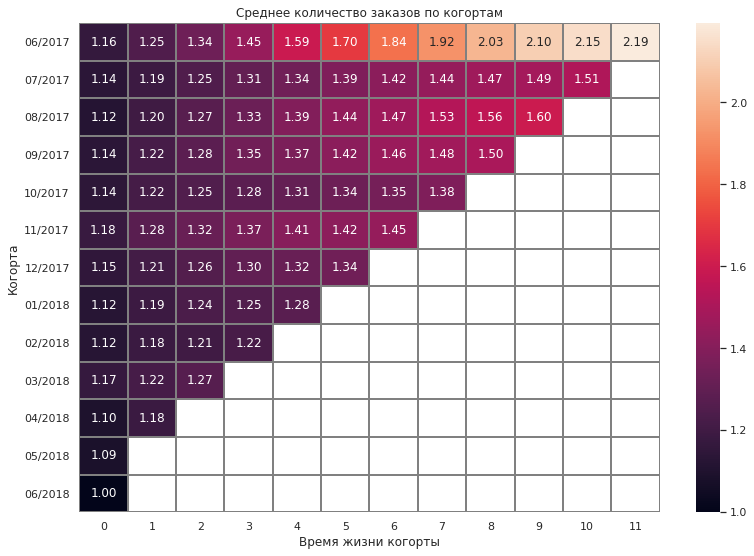

In [51]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Среднее количество заказов по когортам')
sns.heatmap(average_orders_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');
plt.xlabel('Время жизни когорты')
plt.ylabel('Когорта')

По тепловой карте видно, что на шестой месяц жизни когорт среднее количество покупок на одного покупателся составляет около 1.4 Найдем это число более точно.

In [52]:
print('Среднее количество покупок на одного покупателя за 6 месяцев: {:.2f}'.format(order_cohorts.query('cohort_lifetime==5')['average_orders'].mean()))

Среднее количество покупок на одного покупателя за 6 месяцев: 1.43


Итак, среднее количество покупок на одного покупателя за 6 месяцев равно 1.43. Перейдем к следующему шагу.

#### Средний чек <a class="anchor" id="3.2.3">

Сгруппируем покупки по времени их совершения, выделив количество и общую сумму покупок.

In [53]:
#Сначала выделим из даты и времени совершения покупки дату
orders_df['order_date']=orders_df['Buy Ts'].dt.date
#Сгруппируем покупки по дате
aov_grouped=orders_df.groupby('order_date').agg({'Revenue':'sum','Uid':'count'}).reset_index()
#Посмотрим, что получилось
display(aov_grouped.head(20))

,order_date,Revenue,Uid
0,2017-06-01,389.46,96
1,2017-06-02,324.11,111
2,2017-06-03,166.48,67
3,2017-06-04,195.21,66
4,2017-06-05,441.49,161
5,2017-06-06,543.93,198
6,2017-06-07,485.98,197
7,2017-06-08,443.85,181
8,2017-06-09,566.51,131
9,2017-06-10,159.20,42


Теперь вычислим средний чек за каждую дату, разделив общую стоимость покупок на их количество. 

In [54]:
aov_grouped['aov']=aov_grouped['Revenue']/aov_grouped['Uid']
display(aov_grouped.head(20))

,order_date,Revenue,Uid,aov
0,2017-06-01,389.46,96,4.056875
1,2017-06-02,324.11,111,2.919910
2,2017-06-03,166.48,67,2.484776
3,2017-06-04,195.21,66,2.957727
4,2017-06-05,441.49,161,2.742174
5,2017-06-06,543.93,198,2.747121
6,2017-06-07,485.98,197,2.466904
7,2017-06-08,443.85,181,2.452210
8,2017-06-09,566.51,131,4.324504
9,2017-06-10,159.20,42,3.790476


Построим график, чтобы понять, как меняется этот показатель во времени.

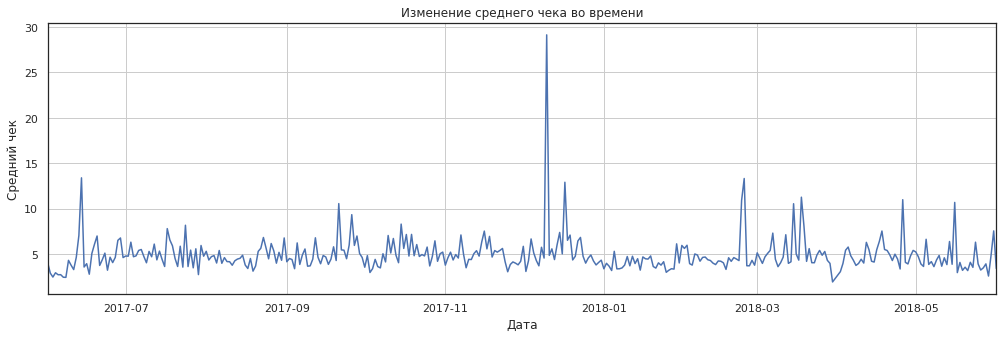

In [55]:
aov_grouped.plot(x='order_date', y='aov', figsize=(17,5), grid=True, legend=False, title='Изменение среднего чека во времени')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Как видим, на графике среднего чека имеются пики, самый большой из их - перед Новым годов и очевидно связанный с ним. Но глобальных тенденций к росту или падению не видно. Найдем усредненное значение среднего чека за весь период.

In [56]:
print('Усредненное значение среднего чека за период: {:.2f}'.format(aov_grouped['aov'].mean()))

Усредненное значение среднего чека за период: 4.94


Как видим, средний чек за период равен 4.94. Перейдем к следующему шагу.

#### Изменение LTV покупателя по когортам <a class="anchor" id="3.2.4">

Для вычисления LTV снова воспользуемся когортным анализом. Часть нужных действий мы уже выполнили ранее. Начнем с вычисления количества новых покупателей за каждый месяц.

In [57]:
order_cohort_sizes = (orders_df.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)
order_cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(order_cohort_sizes.head(10))

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Теперь сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [58]:
order_cohorts_revenue = (orders_df.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index())
display(order_cohorts_revenue.head(10))

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
5,2017-06-01,2017-11-01,1487.92
6,2017-06-01,2017-12-01,1922.74
7,2017-06-01,2018-01-01,1176.56
8,2017-06-01,2018-02-01,1119.15
9,2017-06-01,2018-03-01,1225.51


Теперь добавим к информации о когортах сведения о том, сколько людей в первый раз совершили покупку в каждый месяц.

In [59]:
order_cohorts_ltv = pd.merge(order_cohort_sizes, order_cohorts_revenue, on='first_order_month')
display(order_cohorts_ltv.head(20))

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
5,2017-06-01,2023,2017-11-01,1487.92
6,2017-06-01,2023,2017-12-01,1922.74
7,2017-06-01,2023,2018-01-01,1176.56
8,2017-06-01,2023,2018-02-01,1119.15
9,2017-06-01,2023,2018-03-01,1225.51


Далее мы должны были бы умножить выручку на маржинальность. Но поскольку по условиям задачи маржинальность равна 100%, этот шаг можно пропустить. Вместо этого добавим столбец с информацией о месяце жизни когорты.

In [60]:
order_cohorts_ltv['age'] = (order_cohorts_ltv['order_month'] - order_cohorts_ltv['first_order_month']) / np.timedelta64(1, 'M')
order_cohorts_ltv['age'] = order_cohorts_ltv['age'].round().astype('int')
display(order_cohorts_ltv.head(10))

,first_order_month,n_buyers,order_month,Revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
5,2017-06-01,2023,2017-11-01,1487.92,5
6,2017-06-01,2023,2017-12-01,1922.74,6
7,2017-06-01,2023,2018-01-01,1176.56,7
8,2017-06-01,2023,2018-02-01,1119.15,8
9,2017-06-01,2023,2018-03-01,1225.51,9


Теперь найдем непосредственно LTV. Разделим выручку когорт за каждый месяц на число людей в когорте.

In [61]:
order_cohorts_ltv['ltv'] = order_cohorts_ltv['Revenue'] / order_cohorts_ltv['n_buyers']
display(order_cohorts_ltv.head(10))

,first_order_month,n_buyers,order_month,Revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
5,2017-06-01,2023,2017-11-01,1487.92,5,0.735502
6,2017-06-01,2023,2017-12-01,1922.74,6,0.950440
7,2017-06-01,2023,2018-01-01,1176.56,7,0.581592
8,2017-06-01,2023,2018-02-01,1119.15,8,0.553213
9,2017-06-01,2023,2018-03-01,1225.51,9,0.605788


Теперь добавим столбец с максимальным временем жизни когорты - оно понадобится нам для того, чтобы отобрать, согласно условиям задачи, только когорты, прожившие не менее 6 месяцев.

In [62]:
order_cohorts_ltv['maxlife']=order_cohorts_ltv.groupby('first_order_month')['age'].transform(pd.Series.max)
display(order_cohorts_ltv.head(20))

,first_order_month,n_buyers,order_month,Revenue,age,ltv,maxlife
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,11
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,11
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,11
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,11
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,11
5,2017-06-01,2023,2017-11-01,1487.92,5,0.735502,11
6,2017-06-01,2023,2017-12-01,1922.74,6,0.950440,11
7,2017-06-01,2023,2018-01-01,1176.56,7,0.581592,11
8,2017-06-01,2023,2018-02-01,1119.15,8,0.553213,11
9,2017-06-01,2023,2018-03-01,1225.51,9,0.605788,11


Наконец, добавим кумулятивный LTV, последовательно просуммировав LTV для каждой когорты.

In [63]:
order_cohorts_ltv['cumulative_ltv']=order_cohorts_ltv.groupby('first_order_month')['ltv'].transform(pd.Series.cumsum)
display(order_cohorts_ltv.head(20))

,first_order_month,n_buyers,order_month,Revenue,age,ltv,maxlife,cumulative_ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,11,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,11,5.209743
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,11,5.647380
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,11,6.602051
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,11,7.624582
5,2017-06-01,2023,2017-11-01,1487.92,5,0.735502,11,8.360084
6,2017-06-01,2023,2017-12-01,1922.74,6,0.950440,11,9.310524
7,2017-06-01,2023,2018-01-01,1176.56,7,0.581592,11,9.892116
8,2017-06-01,2023,2018-02-01,1119.15,8,0.553213,11,10.445329
9,2017-06-01,2023,2018-03-01,1225.51,9,0.605788,11,11.051117


Оставим только те когорты, которые прожили не менее 6 месяцев, и построим из них сводную таблицу с тепловой картой.

Text(93.5, 0.5, 'Когорта')

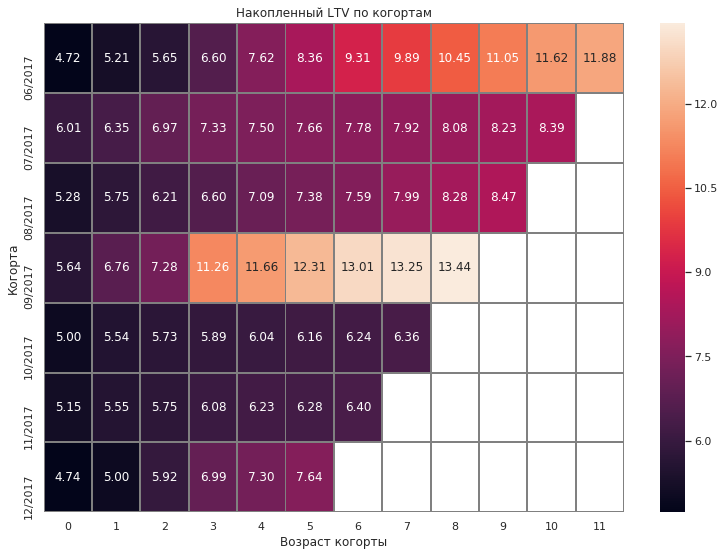

In [64]:
output_ltv = order_cohorts_ltv.query('maxlife>=5').pivot_table(index='first_order_month', columns='age', values='cumulative_ltv')
output_ltv.fillna('')
output_ltv.index = output_ltv.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Накопленный LTV по когортам')
sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray');
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')

Как видим, после первого месяца накопленный LTV растет медленно, не считая когорты сентября 2017 года - у нее на четвертый месяц приходится резкий рост. Вычислим средний LTV за 6 месяцев для когорт, проживших не менее 6 месяцев.

In [65]:
print('Средний LTV за 6 месяцев для когорт, проживших не менее 6 месяцев: {:.2f}'.format(output_ltv.loc[:,5].mean()))

Средний LTV за 6 месяцев для когорт, проживших не менее 6 месяцев: 7.97


Итак, средний LTV за 6 месяцев для когорт, проживших не меньше 6 месяцев, равен 7,97. На этом данный шаг закончен.

#### Вывод <a class="anchor" id="3.2.5">

На этом шаге мы изучили метрики электронной коммерции. Оказалось, что медианный покупатель совершает первую покупку в первый же день посещения сайта, но есть большое количество людей, которые не совершили вообще ни одной покупки. Среднее количество покупок за 6 месяцев на одного покупателя оказалось равно 1,46. Исследование среднего чека за период показало, что он равен 4,94. Наконец, было изучено LTV и выяснено, что средний LTV за 6 месяцев для когорт, проживших не меньше 6 месяцев, равен 7,97.

### Маркетинговые метрики <a class="anchor" id="3.3">

#### Общая сумма расходов на маркетинг и распределение по источникам <a class="anchor" id="3.3.1">

Обратимся к датафрейму costs_df, где содержатся данные о затратах на маркетинг. Для начала подсчитаем сумму затрат по каждому рекламному источнику.

In [66]:
marketing_sources=costs_df.groupby('source_id')['costs'].sum()
display(marketing_sources)

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Как видим, выделяется маркетинговый источник 3. Найдем общую сумму маркетинговых расходов по всем источникам.

In [67]:
print('Общая сумма расходов на маркетинг:',costs_df['costs'].sum())

Общая сумма расходов на маркетинг: 329131.62


Итак, общая сумма расходов на маркетинг равна 329131,62. Теперь составим сводную таблицу изменения расходов на маркетинг по разным источникам во времени, сгруппировав данные по месяцам.

In [68]:
#Выделяем из даты дасхода на маркетинг месяц
costs_df['month']=costs_df['dt'].astype('datetime64[M]')
#Строим сводную таблицу
costs_pivot=costs_df.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').reset_index()
#Посмотрим, что получилось
display(costs_pivot.head(10))

source_id,month,1,2,3,4,5,9,10
0,2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
5,2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
6,2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
7,2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
8,2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88
9,2018-03-01,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41


Теперь построим графики, чтобы визуализировать данные из сводной таблицы.

Text(0, 0.5, 'Маркетинговые расходы')

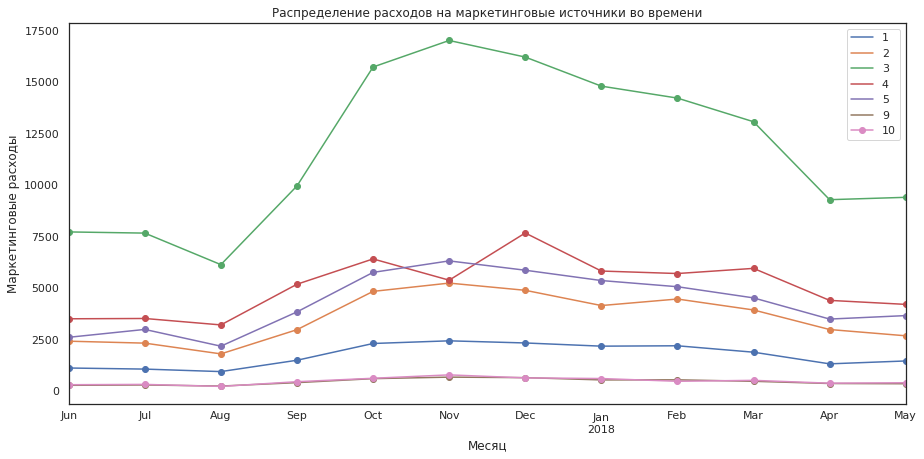

In [69]:
ax=costs_pivot.plot(style='o-', x='month', y=1, grid=True, figsize=(15,7), title='Распределение расходов на маркетинговые источники во времени')
for source in {2,3,4,5,9,10}:
    costs_pivot.plot(ax=ax, style='o-', x='month', y=source)
plt.xlabel('Месяц')
plt.ylabel('Маркетинговые расходы')

Как видим, принципиальное распределение рекламных источников друг относительно друга почти не меняется с течением времени: на один месяц источники 4 и 5 меняются местами, в остальном их относительные доли остаются более или менее стабильными, за исключением источника 3, который, хотя всегда находится на первом месте по затратам, то приближается к другим источникам, то очень сильно выходит вперед. Причем момент начала ухода этого источника в отрыв приходится на сентябрь и предшествует резкому сезонному росту среднего чека и LTV, которые мы наблюдали на предыдущих шагах. Возможно, здесь имеется связь, но более определенно об этом сказать мы сможем далее.

#### Средний CAC на одного покупателя <a class="anchor" id="3.3.2">

Для вычисления CAC по отдельным источникам трафика нам нужно понять, к какому именно источнику трафика "приписать" каждого пользователя. Поскольку каждый пользователь мог заходить на сайт несколько раз из разных источников, примем, что "главным" считается тот источник, из которого пользователь зашел на сайт в первый раз. Составим датафрейм, в котором будет отражено, к какой когорте относится пользователь (т.е. в каком месяце он зашел на сайт в первый раз) и из какого источника произошел этот первый заход.

Для начала найдем самую раннее время захода на сайт для каждого пользователя. 

In [70]:
#Выделяем Series, в который записываем время первого посещения сайта
first_visit_time = visits_df.groupby(['Uid'])['Start Ts'].min()
first_visit_time.name = 'first_visit_time'
#Объединяем Series с исходным датафреймом
visits_df = visits_df.join(first_visit_time,on='Uid')
#Посмотрим, что получилось
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_visit_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01,0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01,0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2018-05-01,2,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-01,2017-12-01,0,2017-12-27 14:06:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0,2017-09-03 21:35:00
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29,2017-06-01,2018-01-01,7,2017-06-29 09:00:00
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05,2017-11-01,2017-11-01,0,2017-11-05 15:14:00
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180,2017-07-19,2017-07-01,2017-07-01,0,2017-07-19 10:41:00
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60,2017-11-08,2017-11-01,2017-11-01,0,2017-11-08 13:42:00


Теперь отберем датафрейм только с первыми сессиями, т.е. теми, где дата и время посещения равны минимальной дате и времени посещения, и объединим его с общим датафреймом по визитам.

In [71]:
first_visits=visits_df.query('`Start Ts`==first_visit_time')[{'Uid','Source Id'}]
first_visits.set_axis(['Uid','first_source_id'],axis = 'columns',inplace = True)
visits_df=visits_df.merge(first_visits, on='Uid')
display(visits_df.head(10))

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_length,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_visit_time,first_source_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01,0,2017-12-20 17:20:00,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01,0,2018-02-19 16:53:00,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0,2017-07-01 01:54:00,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2018-05-01,2,2018-03-09 20:05:00,4
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09,2018-03-01,2018-03-01,0,2018-03-09 20:05:00,4
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-01,2017-12-01,0,2017-12-27 14:06:00,3
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0,2017-09-03 21:35:00,5
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-01-01,2017-10-01,2017-10-26,2017-10-27,2520,2017-09-03,2017-09-01,2017-10-01,1,2017-09-03 21:35:00,5
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-04,1140,2017-09-03,2017-09-01,2017-09-01,0,2017-09-03 21:35:00,5
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-01-01,2017-10-01,2017-10-26,2017-10-27,480,2017-09-03,2017-09-01,2017-10-01,1,2017-09-03 21:35:00,5


Теперь составим таблицу по когортам, где сведем воедино данные о количестве пользователей в данной когорте и о потраченных на их привлечение средствах. Начнем с общих данных, без разбиения на отдельные источники трафика.

In [72]:
#Группируем данные о расходах на привлечение пользователей по месяцам
costs_df_grouped=costs_df.groupby('month')['costs'].sum()
#Соединяем эти данные с ранее полученной информацией о количестве новых покупателей по месяцам
cac_total=pd.merge(order_cohort_sizes, costs_df_grouped, left_on='first_order_month', right_on='month')
#Получаем CAC, поделив расходы на привлечение на количество привлеченных покупателей
cac_total['cac']=cac_total['costs']/cac_total['n_buyers']
#Смотрим, что получилось
display(cac_total.head(10))

,first_order_month,n_buyers,costs,cac
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1923,18240.59,9.485486
2,2017-08-01,1370,14790.54,10.796015
3,2017-09-01,2581,24368.91,9.441654
4,2017-10-01,4340,36322.88,8.369327
5,2017-11-01,4081,37907.88,9.288870
6,2017-12-01,4383,38315.35,8.741809
7,2018-01-01,3373,33518.52,9.937302
8,2018-02-01,3651,32723.03,8.962758
9,2018-03-01,3533,30415.27,8.608907


Для визуализации полученных значений построим график.

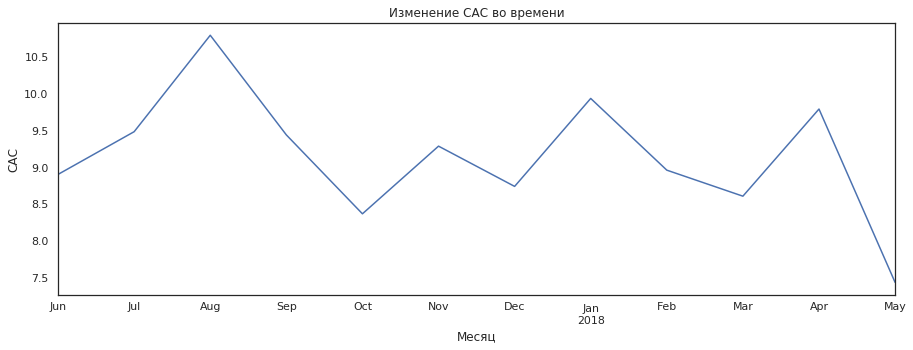

In [73]:
cac_total.plot(x='first_order_month', y='cac', figsize=(15,5), legend=False, title='Изменение CAC во времени')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.show()

Как видим, в августе стоимость привлечения пользователей резко выросла, а к октябрю резко упала. Посмотрим на среднее значение.

In [74]:
print('Средний CAC по всем источникам трафика: {:.2f}'.format(cac_total['cac'].mean()))

Средний CAC по всем источникам трафика: 9.15


Как видим, средний CAC равен 9,15. Теперь изучим CAC в разрезе источников трафика. Для этого объединим датафрейм с заказами с информацией об основном маркетинговом источнике для того или иного пользователя. 

In [75]:
orders_df=orders_df.merge(first_visits, how='left', on='Uid')
display(orders_df.head(10))

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,cohort_lifetime,order_date,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01,3
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01,0,2017-06-01,3
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01,0,2017-06-01,5
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01,1
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01,4
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01,0,2017-06-01,1


Теперь сгруппируем данные по когортам и источникам трафика.

In [76]:
cac_grouped=orders_df.groupby(['first_order_month','first_source_id']).agg({'Uid':'nunique'}).reset_index()
display(cac_grouped.head(10))

,first_order_month,first_source_id,Uid
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
5,2017-06-01,9,68
6,2017-06-01,10,95
7,2017-07-01,1,160
8,2017-07-01,2,208
9,2017-07-01,3,512


Теперь вычислим, сколько денег было потрачено на каждый маркетинговый источник помесячно.

In [77]:
costs_grouped=costs_df.groupby(['month','source_id']).agg({'costs':'sum'}).reset_index()
display(costs_grouped.head(10))

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


Соединим два полученных набора данных: о количестве привлеченных покупателей и о затратах на их привлечение.

In [78]:
cac_grouped=cac_grouped.merge(costs_grouped, left_on=['first_order_month','first_source_id'], right_on=['month','source_id'])
display(cac_grouped.head(20))

,first_order_month,first_source_id,Uid,month,source_id,costs
0,2017-06-01,1,190,2017-06-01,1,1125.61
1,2017-06-01,2,235,2017-06-01,2,2427.38
2,2017-06-01,3,638,2017-06-01,3,7731.65
3,2017-06-01,4,413,2017-06-01,4,3514.80
4,2017-06-01,5,384,2017-06-01,5,2616.12
5,2017-06-01,9,68,2017-06-01,9,285.22
6,2017-06-01,10,95,2017-06-01,10,314.22
7,2017-07-01,1,160,2017-07-01,1,1072.88
8,2017-07-01,2,208,2017-07-01,2,2333.11
9,2017-07-01,3,512,2017-07-01,3,7674.37


Наконец, разделим затраты на количество привлеченных покупателей, чтобы найти CAC.

In [79]:
cac_grouped['cac']=cac_grouped['costs']/cac_grouped['Uid']
cac_grouped=cac_grouped.drop(['first_order_month','source_id'], axis=1)
display(cac_grouped.head(20))

,first_source_id,Uid,month,costs,cac
0,1,190,2017-06-01,1125.61,5.924263
1,2,235,2017-06-01,2427.38,10.329277
2,3,638,2017-06-01,7731.65,12.118574
3,4,413,2017-06-01,3514.80,8.510412
4,5,384,2017-06-01,2616.12,6.812813
5,9,68,2017-06-01,285.22,4.194412
6,10,95,2017-06-01,314.22,3.307579
7,1,160,2017-07-01,1072.88,6.705500
8,2,208,2017-07-01,2333.11,11.216875
9,3,512,2017-07-01,7674.37,14.989004


Составим сводную таблицу, на которой соберем данные по каждому источнику.

In [80]:
cac_pivot=cac_grouped.pivot_table(index='month', columns='first_source_id', values='cac').reset_index()
display(cac_pivot.head(20))

first_source_id,month,1,2,3,4,5,9,10
0,2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,4.194412,3.307579
1,2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,5.818077,6.467059
2,2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,4.080820,6.285676
3,2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,4.777241,5.356628
4,2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,4.836587,3.001148
5,2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,4.711586,6.190313
6,2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,5.437851,7.598353
7,2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,6.839500,6.677717
8,2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,6.565476,3.909593
9,2018-03-01,6.736975,11.700712,13.640094,5.515143,8.578826,2.983168,2.830161


Построим графики, чтобы визуализировать данные из сводной таблицы.

Text(0, 0.5, 'CAC')

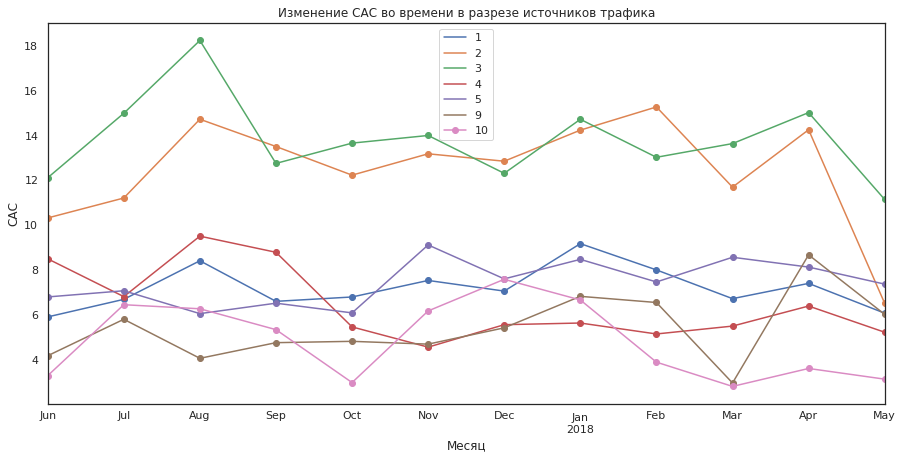

In [81]:
ax_cac=cac_pivot.plot(style='o-', x='month', y=1, grid=True, figsize=(15,7), title='Изменение CAC во времени в разрезе источников трафика')
for source in {2,3,4,5,9,10}:
    cac_pivot.plot(ax=ax_cac, style='o-', x='month', y=source)
plt.xlabel('Месяц')
plt.ylabel('CAC')

Как видим, в худшую сторону выделяются источники трафика 3 и 2, причем первый остается на первом месте по CAC почти в каждом месяце. Остальные источники идут более плотной группой, хотя источник 10 чаще оказывается на последних местах. Выведем усредненные значения CAC за период по каждому источнику.

In [82]:
for source in {1,2,3,4,5,9,10}:
    print('Средний CAC по источнику {}:'.format(source), cac_pivot[source].mean())

Средний CAC по источнику 1: 7.212107126087031
Средний CAC по источнику 2: 12.504067946334564
Средний CAC по источнику 3: 13.802743097448406
Средний CAC по источнику 4: 6.439374022901785
Средний CAC по источнику 5: 7.451938083549941
Средний CAC по источнику 9: 5.4138915833226795
Средний CAC по источнику 10: 4.867125100109491


Цифры подтверждают выводы, которые мы уже сделали выше: самый высокий CAC у источников 2 и 3, далее плотной группой следуют остальные, из который самый низкий средний CAC - у десятого. Изменения по месяцам носят в целом хаотичный характер, но обращает на себя внимание резкое снижение среднего CAC у второго источника в последнем месяце - возможно, это позитивная тенденция, хотя утверждать это пока преждевременно. 

В любом случае, чтобы оценить эффективность того или иного источника трафика, одного CAC мало - надо смотреть на ROMI, чем мы и займемся на следующем шаге.

#### Рассчитываем ROMI по когортам в разрезе источников <a class="anchor" id="3.3.3">

Настало время соединить два показателя, которые мы нашли ранее: LTV и CAC. Но перед этим нам необходимо найти LTV в разрезе источников трафика. Обратимся к датафрейму с информацией о покупках и сгруппируем их по когортам и источникам трафика, чтобы найти количество пользователей в каждой когорте в разрезе источников трафика.

In [83]:
order_cohort_source = (orders_df.groupby(['first_order_month','first_source_id'])
    .agg({'Uid': 'nunique'})
    .reset_index()
)

display(order_cohort_source.head(10))

,first_order_month,first_source_id,Uid
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
5,2017-06-01,9,68
6,2017-06-01,10,95
7,2017-07-01,1,160
8,2017-07-01,2,208
9,2017-07-01,3,512


Теперь аналогичным образом сгруппируем данные, чтобы найти прибыль по когортам и источникам трафика.

In [84]:
order_cohorts_source_revenue = (orders_df.groupby(['first_order_month', 'order_month', 'first_source_id']).agg({'Revenue': 'sum'}).reset_index())

display(order_cohorts_source_revenue.head(10))

,first_order_month,order_month,first_source_id,Revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89
5,2017-06-01,2017-06-01,9,242.69
6,2017-06-01,2017-06-01,10,229.35
7,2017-06-01,2017-07-01,1,414.98
8,2017-06-01,2017-07-01,2,115.54
9,2017-06-01,2017-07-01,3,71.97


Теперь объединим в одну таблицы, полученные в двух предыдущих действиях.

In [85]:
order_source_romi=pd.merge(order_cohort_source, order_cohorts_source_revenue, on=['first_order_month','first_source_id'])
display(order_source_romi.head(10))

,first_order_month,first_source_id,Uid,order_month,Revenue
0,2017-06-01,1,190,2017-06-01,1378.70
1,2017-06-01,1,190,2017-07-01,414.98
2,2017-06-01,1,190,2017-08-01,419.43
3,2017-06-01,1,190,2017-09-01,714.24
4,2017-06-01,1,190,2017-10-01,811.20
5,2017-06-01,1,190,2017-11-01,389.34
6,2017-06-01,1,190,2017-12-01,490.48
7,2017-06-01,1,190,2018-01-01,479.23
8,2017-06-01,1,190,2018-02-01,432.15
9,2017-06-01,1,190,2018-03-01,316.30


Теперь вновь найдем LTV, теперь уже по источникам трафика, поделив прибыль на количество пользователей.

In [86]:
order_source_romi['ltv']=order_source_romi['Revenue']/order_source_romi['Uid']
display(order_source_romi.head(20))

,first_order_month,first_source_id,Uid,order_month,Revenue,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,4.269474
5,2017-06-01,1,190,2017-11-01,389.34,2.049158
6,2017-06-01,1,190,2017-12-01,490.48,2.581474
7,2017-06-01,1,190,2018-01-01,479.23,2.522263
8,2017-06-01,1,190,2018-02-01,432.15,2.274474
9,2017-06-01,1,190,2018-03-01,316.30,1.664737


Присоединим к этому набору данных данные по CAC в разрезе источников, полученные на предыдущем шаге.

In [87]:
order_source_romi=order_source_romi.merge(cac_grouped, left_on=['first_order_month','first_source_id'], right_on=['month','first_source_id'])
display(order_source_romi.head(20))

,first_order_month,first_source_id,Uid_x,order_month,Revenue,ltv,Uid_y,month,costs,cac
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,190,2017-06-01,1125.61,5.924263
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,190,2017-06-01,1125.61,5.924263
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,190,2017-06-01,1125.61,5.924263
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,190,2017-06-01,1125.61,5.924263
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,190,2017-06-01,1125.61,5.924263
5,2017-06-01,1,190,2017-11-01,389.34,2.049158,190,2017-06-01,1125.61,5.924263
6,2017-06-01,1,190,2017-12-01,490.48,2.581474,190,2017-06-01,1125.61,5.924263
7,2017-06-01,1,190,2018-01-01,479.23,2.522263,190,2017-06-01,1125.61,5.924263
8,2017-06-01,1,190,2018-02-01,432.15,2.274474,190,2017-06-01,1125.61,5.924263
9,2017-06-01,1,190,2018-03-01,316.30,1.664737,190,2017-06-01,1125.61,5.924263


Добавим колонку с накопленным LTV по каждому источнику трафика для каждой когорты.

In [88]:
order_source_romi['cumulative_ltv'] = order_source_romi.groupby(['first_order_month','first_source_id'])['ltv'].transform(pd.Series.cumsum)
display(order_source_romi.head(20))

,first_order_month,first_source_id,Uid_x,order_month,Revenue,ltv,Uid_y,month,costs,cac,cumulative_ltv
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,190,2017-06-01,1125.61,5.924263,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,190,2017-06-01,1125.61,5.924263,9.440421
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,190,2017-06-01,1125.61,5.924263,11.647947
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,190,2017-06-01,1125.61,5.924263,15.407105
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,190,2017-06-01,1125.61,5.924263,19.676579
5,2017-06-01,1,190,2017-11-01,389.34,2.049158,190,2017-06-01,1125.61,5.924263,21.725737
6,2017-06-01,1,190,2017-12-01,490.48,2.581474,190,2017-06-01,1125.61,5.924263,24.307211
7,2017-06-01,1,190,2018-01-01,479.23,2.522263,190,2017-06-01,1125.61,5.924263,26.829474
8,2017-06-01,1,190,2018-02-01,432.15,2.274474,190,2017-06-01,1125.61,5.924263,29.103947
9,2017-06-01,1,190,2018-03-01,316.30,1.664737,190,2017-06-01,1125.61,5.924263,30.768684


Наконец, вычислим накопительный ROMI: поделим накопительный LTV на CAC.

In [89]:
order_source_romi['cumulative_romi']=order_source_romi['cumulative_ltv']/order_source_romi['cac']
display(order_source_romi.head(20))

,first_order_month,first_source_id,Uid_x,order_month,Revenue,ltv,Uid_y,month,costs,cac,cumulative_ltv,cumulative_romi
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,190,2017-06-01,1125.61,5.924263,7.256316,1.224847
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,190,2017-06-01,1125.61,5.924263,9.440421,1.593518
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,190,2017-06-01,1125.61,5.924263,11.647947,1.966143
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,190,2017-06-01,1125.61,5.924263,15.407105,2.600679
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,190,2017-06-01,1125.61,5.924263,19.676579,3.321355
5,2017-06-01,1,190,2017-11-01,389.34,2.049158,190,2017-06-01,1125.61,5.924263,21.725737,3.667247
6,2017-06-01,1,190,2017-12-01,490.48,2.581474,190,2017-06-01,1125.61,5.924263,24.307211,4.102993
7,2017-06-01,1,190,2018-01-01,479.23,2.522263,190,2017-06-01,1125.61,5.924263,26.829474,4.528744
8,2017-06-01,1,190,2018-02-01,432.15,2.274474,190,2017-06-01,1125.61,5.924263,29.103947,4.912670
9,2017-06-01,1,190,2018-03-01,316.30,1.664737,190,2017-06-01,1125.61,5.924263,30.768684,5.193673


Также добавим столбец с возрастами когорт, чтобы лучше ориентироваться в показателях.

In [92]:
order_source_romi['age'] = (order_source_romi['order_month'] - order_source_romi['first_order_month']) / np.timedelta64(1, 'M')
order_source_romi['age'] = order_source_romi['age'].round().astype('int')
display(order_source_romi.head(20))

,first_order_month,first_source_id,Uid_x,order_month,Revenue,ltv,Uid_y,month,costs,cac,cumulative_ltv,cumulative_romi,age
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,190,2017-06-01,1125.61,5.924263,7.256316,1.224847,0
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,190,2017-06-01,1125.61,5.924263,9.440421,1.593518,1
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,190,2017-06-01,1125.61,5.924263,11.647947,1.966143,2
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,190,2017-06-01,1125.61,5.924263,15.407105,2.600679,3
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,190,2017-06-01,1125.61,5.924263,19.676579,3.321355,4
5,2017-06-01,1,190,2017-11-01,389.34,2.049158,190,2017-06-01,1125.61,5.924263,21.725737,3.667247,5
6,2017-06-01,1,190,2017-12-01,490.48,2.581474,190,2017-06-01,1125.61,5.924263,24.307211,4.102993,6
7,2017-06-01,1,190,2018-01-01,479.23,2.522263,190,2017-06-01,1125.61,5.924263,26.829474,4.528744,7
8,2017-06-01,1,190,2018-02-01,432.15,2.274474,190,2017-06-01,1125.61,5.924263,29.103947,4.912670,8
9,2017-06-01,1,190,2018-03-01,316.30,1.664737,190,2017-06-01,1125.61,5.924263,30.768684,5.193673,9


Итак, все нужные нам данные собраны в одной таблице. К сожалению, в таком виде она не очень информативна. Составим из нее несколько сводных таблиц, чтобы ответить на стоящие перед нами вопросы.

Во-первых, нас интересует, как быстро окупаются разные источники трафика. Выведем сводную таблицу, показывающую накопленный ROMI по каждому из источников на каждый месяц жизни когорт.

Text(111.5, 0.5, 'Источник трафика')

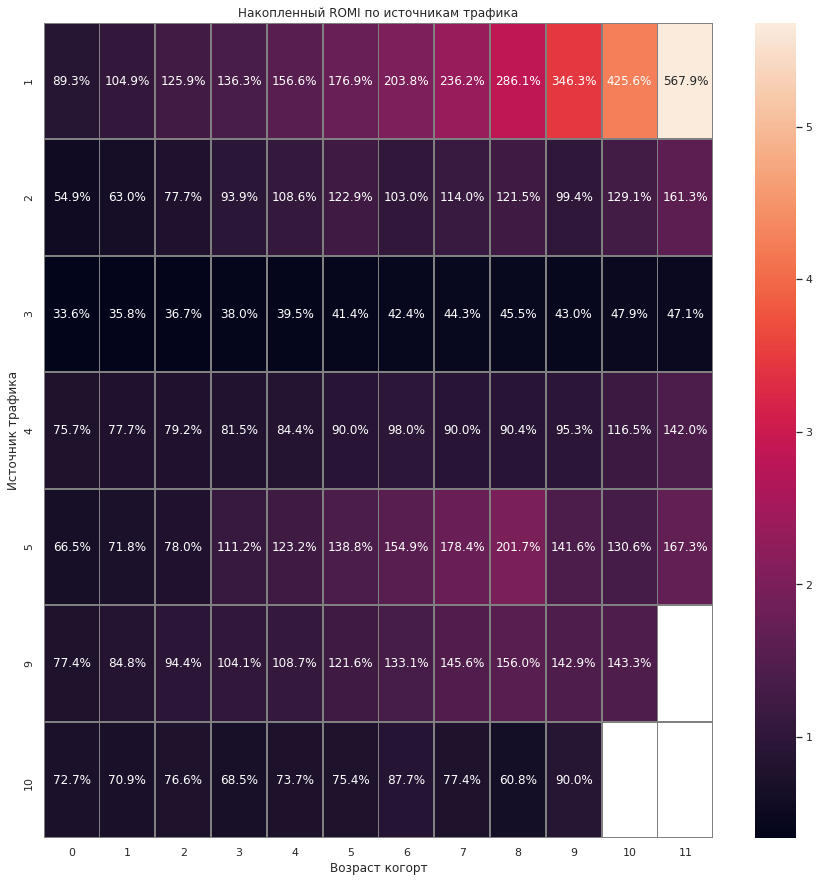

In [93]:
source_pivot=order_source_romi.pivot_table(index='first_source_id', columns='age', values='cumulative_romi', aggfunc='mean')
sns.set(style='white')
plt.figure(figsize=(15, 15))
plt.title('Накопленный ROMI по источникам трафика')
sns.heatmap(source_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.xlabel('Возраст когорт')
plt.ylabel('Источник трафика')

Итак, как мы видим, по эффективности с большим отрывом лидирует источник номер 1 - к 12 месяцу жизни когорт он в среднем окупается более чем на 500%. С другими источниками все обстоит не так радужно - например, источник 3, на который тратится больше всего денег, не окупается даже наполовину. Хороший потенциал также демонстрирует источник номер 5, который к 12 месяцу окупается на 167%, а также номер 9, который окупается на 143% к 11 месяцу.

Теперь посмотрим на результаты когорт - какие из них оказались более эффективными.

Text(111.5, 0.5, 'Когорты')

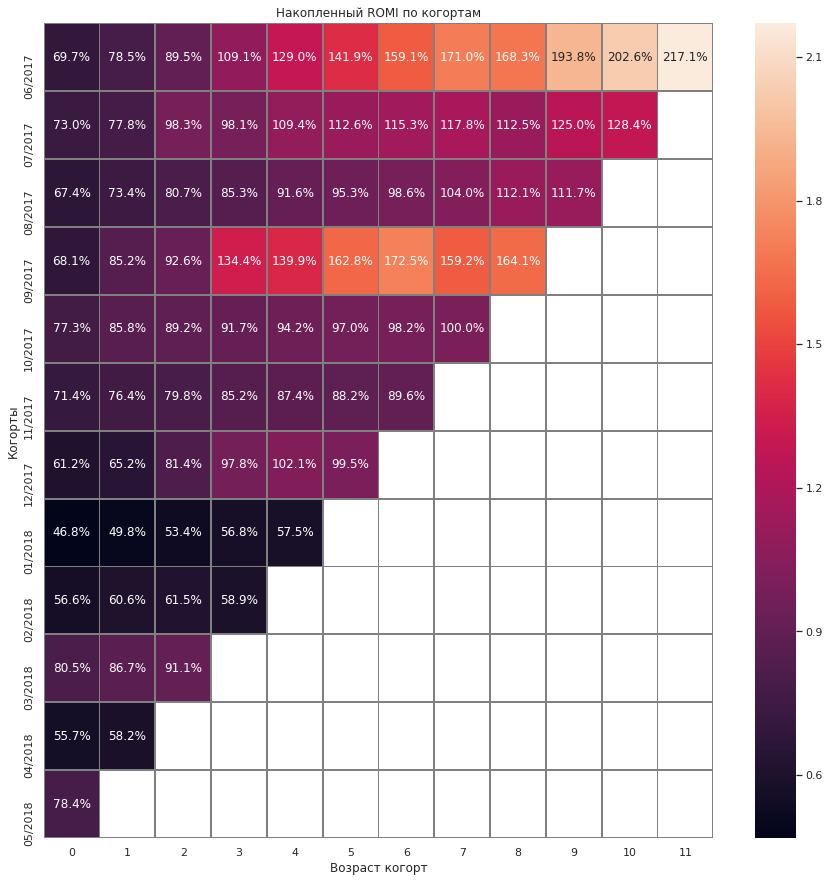

In [94]:
cohorts_romi_pivot=order_source_romi.pivot_table(index='first_order_month', columns='age', values='cumulative_romi', aggfunc='mean')
cohorts_romi_pivot.index = cohorts_romi_pivot.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(15, 15))
plt.title('Накопленный ROMI по когортам')
sns.heatmap(cohorts_romi_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.xlabel('Возраст когорт')
plt.ylabel('Когорты')

Разумеется, сравнивать когорты "в лоб" может быть не очень корректно, т.к. все они имеют разный срок жизни. Но обращают на себя внимание следующие тенденции: <br/>
Во-первых, наибольшую эффективность первого и второго месяцев показывает когорта марта 2018 года. Впрочем, уже в третьем месяце ее эффективность отходит на третье место, так что возможно, что на длинной дистанции она не обязательно будет самой успешной.<br/>
Сезонный всплеск активности покупок приходится на декабрь, и наибольшую пользу из этого смогла извлечь когорта сентября 2017 года, показавшая самый бурный рост.
<br/>
Самая первая когорта июня 2017 года также показывает очень хорошие результаты.

#### Вывод <a class="anchor" id="3.3.4">

На этом шаге мы проанализировали маркетинговые метрики и выяснили, что:
1. Общая сумма расходов на маркетинг равна 329131,62. Наибольшая часть из них приходится на источник 3, наименьшая - на источники 9 и 10.
2. Средний CAC равен 9,15. Самый высокий CAC у источников 3 и 2, причем первый остается на первом месте по CAC почти в каждом месяце. Остальные источники идут более плотной группой, хотя источник 10 чаще оказывается на последних местах.
3. Самый выгодный по ROMI источник трафика - первый, наименее выгодный - третий. Самые выгодные когорты - июня и сентября 2017 года и потенциально марта 2018. Наименее выгодные - февраль и апрель 2018.

## Выводы и рекомендации <a class="anchor" id="4">

#### Источники трафика <a class="anchor" id="4.1">

Как мы увидели в нашем анализе ROMI (пункт 3.3.3), самый перспективный источник - 1, т.к. он обеспечивает наилучшую окупаемость маркетинговых затрат. Следом идут источники 2 и 5. От источника 3 следует отказаться совсем, от 10 вероятно тоже.

#### Выводы после подсчета всех видов метрик <a class="anchor" id="4.2">

Средний DAU равен 907, изменения носят циклический характер со слабой тенденцией к повышению. Средний WAU - 5716, также имеет циклический характер и находится в фазе спада на конец периода. Средний MAU - 23228, к концу периода также находится в фазе падения. Все три показателя очевидно имеют сезонный характер.
Среднее количество заходов на сайт в день для каждого активного пользователя - чуть больше одного, график изменения не показывает устойчивых тенденций к росту или падению или цикличности.
Типичная пользовательская сессия на сайте длится до одной минуты.

Медианный покупатель совершает первую покупку в первый же день посещения сайта, но есть большое количество людей, которые не совершили вообще ни одной покупки. Среднее количество покупок за 6 месяцев на одного покупателя оказалось равно 1,46. Исследование среднего чека за период показало, что он равен 4,94. Средний LTV за 6 месяцев для когорт, проживших не меньше 6 месяцев, равен 7,97. Retention rate сервиса не очень высокий. Средний retention rate на второй месяц жизни когорты - чуть больше 6%.

Общая сумма расходов на маркетинг равна 329131,62. Наибольшая часть из них приходится на источник 3, наименьшая - на источники 9 и 10. Средний CAC равен 9,15. Самый высокий CAC у источников 3 и 2, причем первый остается на первом месте по CAC почти в каждом месяце. Остальные источники идут более плотной группой, хотя источник 10 чаще оказывается на последних местах.
Самый выгодный по ROMI источник трафика - первый, наименее выгодный - третий. Самые выгодные когорты - июня и сентября 2017 года и потенциально марта 2018. Наименее выгодные - февраль и апрель 2018.

#### Самые перспективные для компании когорты клиентов <a class="anchor" id="4.3">

По итогам вычисления ROMI для разных когорт (пункт 3.3.3) мы видим, что самые перспективные для компании когорты - сентябрь 2017 года и вероятно март 2018 г. Когорта июня 2017 г. также показывала хорошие результаты в течение своей жизни, но т.к. она является самой старой, мы не можем с уверенностью сказать, что ее показатели и дальше будут расти, хотя пока что она демонстрирует устойчивый рост.